In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string as st
import re
import nltk
from nltk import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [ ]:
data2 = pd.read_csv('/content/sample_data/ddd.csv')
data2.head()
data2.dropna(inplace = True)
data2.drop_duplicates(inplace = True)

In [ ]:
data2['Pattern Category'] = data2['Pattern Category'].str.lower()
data2 = data2[~data2['Pattern Category'].isin(["sneaksneaking"])]

In [ ]:
data2["Pattern Category"].value_counts()

,count
Pattern Category,
scarcity,419
social proof,312
urgency,210
misdirection,183
obstruction,92
sneaking,64
forced action,30


In [ ]:
import string

def remove_punct(text):
    if isinstance(text, str):
        return "".join([ch for ch in text if ch not in string.punctuation])
    else:
        return str(text)


In [ ]:
data2['removed_punc'] = data2['Pattern String'].apply(lambda x: remove_punct(x))
data2.head()


,Pattern String,Pattern Category,removed_punc
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...
3,9 people are viewing this.,social proof,9 people are viewing this
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour


In [ ]:
def remove_numbers(text):
  result = []
  i = 0

  while i < len(text):
    if text[i].isdigit():
      j = i
      while j < len(text) and text[j].isdigit():
        j += 1
      result.append('NUM')
      i = j
    else:
      result.append(text[i])
      i += 1
  return ''.join(result)

In [ ]:
# data2['removed_punc'] = data2['removed_punc'].apply(lambda msg : remove_numbers(msg))

In [ ]:
''' Convert text to lower case tokens. Here, split() is applied on white-spaces. But, it could be applied
    on special characters, tabs or any other string based on which text is to be seperated into tokens.
'''
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [ ]:
data2['tokens'] = data2['removed_punc'].apply(lambda msg : tokenize(msg))
data2.head()

,Pattern String,Pattern Category,removed_punc,tokens
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b..."
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase..."
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ..."
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]"
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]"


In [ ]:
# Remove tokens of length less than 0
def remove_small_words(text):
    return [x for x in text if len(x) > 0 ]

In [ ]:
data2['larger_tokens'] = data2['tokens'].apply(lambda x : remove_small_words(x))
data2.head()

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b...","[collin, p, from, grandview, missouri, just, b..."
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase...","[faith, in, glendale, united, states, purchase..."
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, from, karachi, just, bought, ..."
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]","[9, people, are, viewing, this]"
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, this, in, the, last, hour]"


In [ ]:
''' Remove stopwords. Here, NLTK corpus list is used for a match. However, a customized user-defined
    list could be created and used to limit the matches in input text.
'''
nltk.download('stopwords')

def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data2['clean_tokens'] = data2['larger_tokens'].apply(lambda x : remove_stopwords(x))
data2.head()

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens,clean_tokens
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b...","[collin, p, from, grandview, missouri, just, b...","[collin, p, grandview, missouri, bought, burgu..."
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase...","[faith, in, glendale, united, states, purchase...","[faith, glendale, united, states, purchased, c..."
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, karachi, bought, stylish, met..."
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]","[9, people, are, viewing, this]","[9, people, viewing]"
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, last, hour]"


In [ ]:
# Apply stemming to get root words
def stemming(text):
    ps = PorterStemmer()
    return [ps.stem(word) for word in text]

In [ ]:
data2['stem_words'] = data2['clean_tokens'].apply(lambda wrd: stemming(wrd))
data2.head()

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens,clean_tokens,stem_words
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b...","[collin, p, from, grandview, missouri, just, b...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu..."
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase...","[faith, in, glendale, united, states, purchase...","[faith, glendale, united, states, purchased, c...","[faith, glendal, unit, state, purchas, choos, ..."
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met..."
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]","[9, people, are, viewing, this]","[9, people, viewing]","[9, peopl, view]"
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, last, hour]","[5338, peopl, view, last, hour]"


Lemmatization converts word to it's dictionary base form. This process takes language grammar and vocabulary into consideration while conversion. Hence, it is different from Stemming in that it does not merely truncate the suffixes to get the root word.

In [ ]:
# Apply lemmatization on tokens
nltk.download('wordnet')
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data2['lemma_words'] = data2['clean_tokens'].apply(lambda x : lemmatize(x))
data2.head()

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b...","[collin, p, from, grandview, missouri, just, b...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu..."
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase...","[faith, in, glendale, united, states, purchase...","[faith, glendale, united, states, purchased, c...","[faith, glendal, unit, state, purchas, choos, ...","[faith, glendale, united, state, purchased, ch..."
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met..."
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]","[9, people, are, viewing, this]","[9, people, viewing]","[9, peopl, view]","[9, people, viewing]"
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, last, hour]","[5338, peopl, view, last, hour]","[5338, people, viewed, last, hour]"


In [ ]:
# Create sentences to get clean text as input for vectors

def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
data2['clean_text'] = data2['lemma_words'].apply(lambda x : return_sentences(x))
data2.head()

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b...","[collin, p, from, grandview, missouri, just, b...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu...",collin p grandview missouri bought burgundy tw...
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase...","[faith, in, glendale, united, states, purchase...","[faith, glendale, united, states, purchased, c...","[faith, glendal, unit, state, purchas, choos, ...","[faith, glendale, united, state, purchased, ch...",faith glendale united state purchased choose f...
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met...",sharmeen atif karachi bought stylish metal gla...
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]","[9, people, are, viewing, this]","[9, people, viewing]","[9, peopl, view]","[9, people, viewing]",9 people viewing
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, last, hour]","[5338, peopl, view, last, hour]","[5338, people, viewed, last, hour]",5338 people viewed last hour


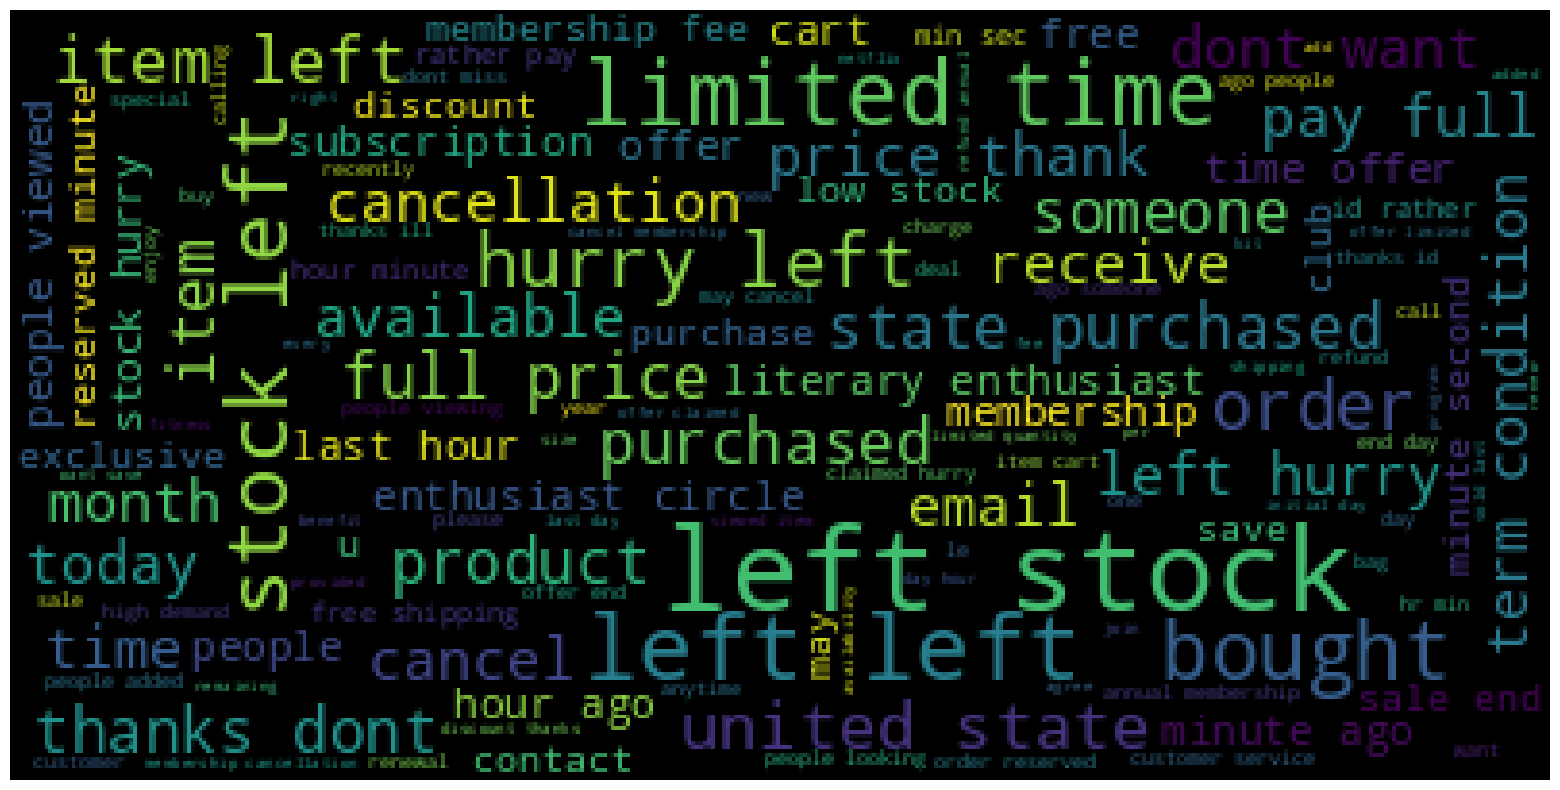

In [ ]:
# Generate a basic word cloud
from wordcloud import WordCloud, ImageColorGenerator

text = " ".join([x for x in data2['clean_text']])
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=30, max_words=1000).generate(text)

# Display the generated image:
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
# Prepare data for the model. Convert label/category in to binary
data3 = data2
#data3.head()
data3

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text
0,Collin P. from Grandview Missouri just bought ...,social proof,Collin P from Grandview Missouri just bought B...,"[collin, p, from, grandview, missouri, just, b...","[collin, p, from, grandview, missouri, just, b...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu...","[collin, p, grandview, missouri, bought, burgu...",collin p grandview missouri bought burgundy tw...
1,"Faith in Glendale, United States purchased a C...",social proof,Faith in Glendale United States purchased a Ch...,"[faith, in, glendale, united, states, purchase...","[faith, in, glendale, united, states, purchase...","[faith, glendale, united, states, purchased, c...","[faith, glendal, unit, state, purchas, choos, ...","[faith, glendale, united, state, purchased, ch...",faith glendale united state purchased choose f...
2,Sharmeen Atif From Karachi just bought Stylish...,social proof,Sharmeen Atif From Karachi just bought Stylish...,"[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, from, karachi, just, bought, ...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met...","[sharmeen, atif, karachi, bought, stylish, met...",sharmeen atif karachi bought stylish metal gla...
3,9 people are viewing this.,social proof,9 people are viewing this,"[9, people, are, viewing, this]","[9, people, are, viewing, this]","[9, people, viewing]","[9, peopl, view]","[9, people, viewing]",9 people viewing
4,5338 people viewed this in the last hour,social proof,5338 people viewed this in the last hour,"[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, this, in, the, last, hour]","[5338, people, viewed, last, hour]","[5338, peopl, view, last, hour]","[5338, people, viewed, last, hour]",5338 people viewed last hour
...,...,...,...,...,...,...,...,...,...
2072,Join the Literary Enthusiasts Circle for a cur...,forced action,Join the Literary Enthusiasts Circle for a cur...,"[join, the, literary, enthusiasts, circle, for...","[join, the, literary, enthusiasts, circle, for...","[join, literary, enthusiasts, circle, curated,...","[join, literari, enthusiast, circl, curat, sel...","[join, literary, enthusiast, circle, curated, ...",join literary enthusiast circle curated select...
2073,Become a member of the Literary Enthusiasts Ci...,forced action,Become a member of the Literary Enthusiasts Ci...,"[become, a, member, of, the, literary, enthusi...","[become, a, member, of, the, literary, enthusi...","[become, member, literary, enthusiasts, circle...","[becom, member, literari, enthusiast, circl, r...","[become, member, literary, enthusiast, circle,...",become member literary enthusiast circle recei...
2074,Enlist in the Literary Enthusiasts Circle to a...,forced action,Enlist in the Literary Enthusiasts Circle to a...,"[enlist, in, the, literary, enthusiasts, circl...","[enlist, in, the, literary, enthusiasts, circl...","[enlist, literary, enthusiasts, circle, access...","[enlist, literari, enthusiast, circl, access, ...","[enlist, literary, enthusiast, circle, access,...",enlist literary enthusiast circle access thoug...
2075,Register for the Literary Enthusiasts Circle a...,forced action,Register for the Literary Enthusiasts Circle a...,"[register, for, the, literary, enthusiasts, ci...","[register, for, the, literary, enthusiasts, ci...","[register, literary, enthusiasts, circle, bene...","[regist, literari, enthusiast, circl, benefit,...","[register, literary, enthusiast, circle, benef...",register literary enthusiast circle benefit ca...


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
from joblib import dump, load

data2.dropna(subset = "clean_text", inplace = True)
data2.drop_duplicates(subset = "clean_text", inplace = True)




# Instantiate LabelEncoder
label_encoder = LabelEncoder()
label_encoder_sub = LabelEncoder()
# Fit and transform the categorical column
y_label = label_encoder.fit_transform(data2['Pattern Category'])
# y_label_sub = label_encoder_sub.fit_transform(smaller_cat['Pattern Category'])

label_encoder.fit(data2['Pattern Category'])
dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']

In [ ]:
smaller_cat.head(50)

,Pattern String,Pattern Category,removed_punc,tokens,larger_tokens,clean_tokens,stem_words,lemma_words,clean_text


In [ ]:
# Split da  ta in to training, testing sets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler



# Separate features and target variable

# Create a RandomOverSampler object
ros = RandomOverSampler(random_state=42)

# Fit and apply the oversampling to the data

tfidf = TfidfVectorizer()
tfidf_sub = TfidfVectorizer()
# X_train = tfidf.fit_transform(text_train)
# X_test = tfidf.transform(text_test)

X = tfidf.fit_transform(data2['clean_text'])
# X_sub = tfidf_sub.fit_transform(smaller_cat['clean_text'])
# X_resampled, y_resampled = ros.fit_resample(X, y_label)


X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size = 0.2)
# X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_sub, y_label_sub, test_size = 0.2)
# print(X_train.shape, X_train_sub.shape)
# print(X_test.shape, X_test_sub.shape)

TF-IDF : Term Frequency - Inverse Document Frequency
The term frequency is the number of times a term occurs in a document. Inverse document frequency is an inverse function of the number of documents in which that a given word occurs.
The product of these two terms gives tf-idf weight for a word in the corpus. The higher the frequency of occurrence of a word, lower is it's weight and vice-versa. This gives more weightage to rare terms in the corpus and penalizes more commonly occuring terms.
Other widely used vectorizer is Count vectorizer which only considers the frequency of occurrence of a word across the corpus.

In [ ]:
tfidf.fit(data2['clean_text'])
dump(tfidf, 'vectorizer2.joblib')

['vectorizer2.joblib']

In [ ]:
# Convert lemmatized words to Tf-Idf feature vectors


print(X_train.toarray())
print(X_train.shape)
print(X_test.toarray())
print(X_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(870, 2120)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(218, 2120)


In [ ]:
# 1st Model - Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)
print('Logistic Regression model fitted..')

pred = lr.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))
f1 = f1_score(y_test, pred, average='weighted')

print("F1 score: {}".format(f1))

Logistic Regression model fitted..
Accuracy score : 0.8990825688073395
Confusion matrix : 
 [[ 1  1  0  0  0  3  0]
 [ 0 19  0  0  0  6  1]
 [ 0  0 18  0  0  0  0]
 [ 0  0  0 53  0  1  0]
 [ 0  0  1  0  7  2  3]
 [ 0  0  0  0  0 58  0]
 [ 0  0  0  0  0  4 40]]
F1 score: 0.8909333262488355


In [ ]:
# 2nd Model - Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
param_grid = {
    'n_estimators': [10],
    'criterion': ['gini'],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'bootstrap': [True],
    'class_weight': ['balanced'],
    'max_samples': [None],
    'random_state' : [42]
}


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

print("Best Hyperparameters:", best_params)


print('Random Forest Classifier model fitted..')
pred = rf.predict(X_test)
print("Accuracy score : {}".format(accuracy_score(y_test, pred)))
print("Confusion matrix : \n {}".format(confusion_matrix(y_test, pred)))
f1 = f1_score(y_test, pred, average='weighted')

print("F1 score: {}".format(f1))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_samples': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 42}
Random Forest Classifier model fitted..
Accuracy score : 0.9311926605504587
Confusion matrix : 
 [[ 5  0  0  0  0  0  0]
 [ 0 23  0  2  0  1  0]
 [ 0  0 18  0  0  0  0]
 [ 0  1  0 52  0  1  0]
 [ 0  1  1  0 10  0  1]
 [ 0  1  0  0  0 57  0]
 [ 0  4  0  2  0  0 38]]
F1 score: 0.9313372788560336


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.corpus import brown
from nltk.corpus import gutenberg
from nltk.tokenize import RegexpTokenizer
from nltk.stem import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle
import joblib
from collections import Counter
from textblob import Word
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
y_pred2 = svc.predict(X_test)

f1 = f1_score(y_test, y_pred2, average='weighted')

print("F1 score: {}".format(f1))

F1 score: 0.8879774176947776


In [ ]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
f1 = f1_score(y_test, y_pred1, average='weighted')

print("F1 score: {}".format(f1))

F1 score: 0.9111672371361365


In [ ]:
ec=VotingClassifier(estimators=[ ('Random Forest', rf),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,1,1])
ec.fit(X_train,y_train)
y_pred6 = ec.predict(X_test)
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))
f1 = f1_score(y_test, y_pred6, average='weighted')

print("F1 score: {}".format(f1))


0.9541284403669725
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.85      0.85      0.85        26
           2       0.95      1.00      0.97        18
           3       0.98      0.98      0.98        54
           4       1.00      0.92      0.96        13
           5       0.97      1.00      0.98        58
           6       0.95      0.91      0.93        44

    accuracy                           0.95       218
   macro avg       0.96      0.95      0.95       218
weighted avg       0.95      0.95      0.95       218

F1 score: 0.9538564001109883


In [ ]:
# rf2 = RandomForestClassifier()
# rf2.fit(X_train_sub, y_train_sub)

# print('Random Forest Classifier model fitted..')
# pred = rf2.predict(X_test_sub)
# print("Accuracy score : {}".format(accuracy_score(y_test_sub, pred)))
# print("Confusion matrix : \n {}".format(confusion_matrix(y_test_sub, pred)))
# f1 = f1_score(y_test_sub, pred, average='weighted')

# print("F1 score: {}".format(f1))

Random Forest Classifier model fitted..
Accuracy score : 1.0
Confusion matrix : 
 [[7]]
F1 score: 1.0


In [ ]:
df = pd.read_csv("/content/check.csv")
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df.drop(df.columns[0], axis = 1, inplace = True)
df.head()

,col
0,['Skip to main content']
1,['in']
2,['Delivering to New Delhi 110020']
3,['Update location']
4,['Electronics']


In [ ]:
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

column_name = df.columns[0]
df[column_name] = df[column_name].astype(str)
df[column_name] = df[column_name].apply(lambda x: sent_tokenize(x) if isinstance(x, str) else [])
df = df.explode(column_name).reset_index(drop=True)
df[column_name] = df[column_name].apply(remove_punct)
df[column_name] = df[column_name].apply(tokenize)
df[column_name] = df[column_name].apply(lemmatize)
df[column_name] = df[column_name].apply(lambda x: None if (len(x) > 10 or len(x) < 2) else x)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df[column_name] = df[column_name].apply(return_sentences)

In [ ]:
df.tail(20)

,col
544,© 19962024 amazon com inc or it affiliate
545,best seller in electronics
548,1 best seller in electronics
550,free delivery by amazon
553,1l viewed in past month
554,1 best seller in inear headphone
558,2l viewed in past month
562,72 off
564,m r pu2009₹499900
565,get it by saturday august 24


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(data2["clean_text"])

TfidfVectorizer()

In [ ]:
dump(ec, 'voting_rf_lr_svc.joblib')

['voting_rf_lr_svc.joblib']

In [ ]:
dump(label_encoder, 'encoder.joblib')

['encoder.joblib']

In [ ]:
tfidf_vectorizer = load("/content/vectorizer2.joblib")

In [ ]:
tfidf_array = tfidf_vectorizer.transform(df["col"])

In [ ]:
label_encoder = load("/content/label_encoder.joblib")

In [ ]:
class_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
# Display the class mapping
print("Class Mapping:", class_mapping)

Class Mapping: {0: 'forced action', 1: 'misdirection', 2: 'obstruction', 3: 'scarcity', 4: 'sneaking', 5: 'social proof', 6: 'urgency'}


In [ ]:
print(tfidf_array)

  (0, 1808)	0.6710293900140674
  (0, 753)	0.741430750466521
  (1, 1418)	0.6023215010062004
  (1, 814)	0.7982535996947573
  (2, 2002)	1.0
  (5, 827)	1.0
  (6, 949)	1.0
  (7, 998)	1.0
  (8, 998)	1.0
  (10, 1012)	1.0
  (14, 734)	1.0
  (16, 1025)	0.7071067811865476
  (16, 648)	0.7071067811865476
  (17, 1050)	0.7071067811865476
  (17, 985)	0.7071067811865476
  (18, 1081)	0.7712333594389131
  (18, 649)	0.6365525157350086
  (19, 1224)	0.7270090206937703
  (19, 1098)	0.6866279078437499
  (22, 541)	1.0
  (23, 1299)	0.7770284466017725
  (23, 558)	0.6294654821129085
  (25, 1392)	1.0
  (27, 1586)	1.0
  (29, 1574)	1.0
  :	:
  (342, 1554)	0.5533371890059984
  (342, 1173)	0.31763277594811484
  (342, 546)	0.6679706115234727
  (343, 2040)	0.3432549642453428
  (343, 1503)	0.504344687043181
  (343, 1385)	0.3585737892343714
  (343, 1132)	0.5572582443823947
  (343, 56)	0.4343967689960412
  (344, 1859)	0.3841850184217324
  (344, 1251)	0.3207741242692851
  (344, 1132)	0.8657400492177583
  (345, 2040)	0.32407

In [ ]:
# probabilities = ec.predict_proba(tfidf_array)
# pre_predicted = ec.predict(tfidf_array)

# probabilities_sub = rf2.predict_proba(tfidf_array2)
numpy_array = df["col"].values
probabilities = ec.predict_proba(tfidf_array)
# rows_above_threshold = np.where(np.max(probabilities, axis=1) > 0.80)[0]
rows_above_threshold = []
thresholds = {
    0: 0.60,  # Threshold for 'forced action'
    1: 0.80,  # Threshold for 'misdirection'
    2: 0.60,  # Threshold for 'obstruction'
    3: 0.80,  # Threshold for 'scarcity'
    4: 0.50,  # Threshold for 'sneaking'
    5: 0.70,  # Threshold for 'social proof'
    6: 0.70   # Threshold for 'urgency'
}
# Iterate over each row in the probabilities array
for i, probs in enumerate(probabilities):
    # Check if the probability for the predicted class is above its specific threshold
    predicted_class = np.argmax(probs)
    if probs[predicted_class] > thresholds[predicted_class]:
        rows_above_threshold.append(i)

rows_above_threshold = np.array(rows_above_threshold)

filtered_data = numpy_array[rows_above_threshold]
predicted_classes = ec.predict(tfidf_array[rows_above_threshold])
confidence_scores = np.max(probabilities[rows_above_threshold], axis=1)
result = pd.DataFrame({'Filtered_Data': filtered_data, 'Predicted_Class': predicted_classes, 'Confidence_Score': confidence_scores})
result.replace({"Predicted_Class": class_mapping}, inplace=True)
result.head(200)

,Filtered_Data,Predicted_Class,Confidence_Score
0,subscribe save,misdirection,0.853735
1,5k bought in past month,social proof,0.798383
2,inclusive of all tax,sneaking,0.599672
3,7 day replacement,urgency,0.769998
4,frequently bought together,social proof,0.941582
5,limited time deal,urgency,0.965403
6,noise cancellation,obstruction,0.713191
7,bought it for it battery backup but got more,social proof,0.858514
8,635 people found this helpful,social proof,0.994267
9,time 👍👍,urgency,0.790779


In [ ]:
!pip install scikit-learn==1.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


,Filtered_Data,Predicted_Class,Confidence_Score
0,add to watchlist,misdirection,0.828746
1,people who viewed this item also viewed,social proof,0.902778
2,12 viewed in the last 24 hour,social proof,0.953070
3,sale end in,urgency,0.941185
4,more than 10 available,scarcity,0.820048
5,located in ca united state,social proof,0.868382
6,authority may apply duty fee and tax upon deli...,sneaking,0.567888


,Filtered_Data,Predicted_Class
0,Add to Watchlist,Misdirection
1,3 watched in the last 24 hours,Social Proof
2,Add to watchlist,Misdirection
3,23 people are watching this,Social Proof
4,Save seller,Misdirection
5,- Feedback left by buyer 9***m (1045),Scarcity
6,- Feedback left by buyer 3***j (169),Scarcity
7,Thanks!,Misdirection
8,- Feedback left by buyer 0***o (1559),Scarcity
9,Thanks,Misdirection


In [ ]:
filtered_data

array(['People who viewed this item also viewed',
       '3 watched in the last 24 hours', '23 people are watching this',
       '- Feedback left by buyer 9***m (1045)',
       '- Feedback left by buyer 3***j (169)',
       '- Feedback left by buyer 0***o (1559)',
       '~LIMITED TIME OFFER~ 15.6" HP ProBook Laptop PC: Radeon R5! 8GB RAM! 256GB SSD!'],
      dtype=object)

In [ ]:
filtered_data_2 = original[rows_for_sub]
result_2 = pd.DataFrame({"Sentence chosen" : filtered_data_2})

NameError: name 'rows_for_sub' is not defined

In [ ]:
result_2.head()

In [ ]:
pre_predicted

In [ ]:
result = pd.DataFrame({'Filtered_Data': filtered_data, 'Predicted_Class': predicted_classes})

In [ ]:
result.replace({"Predicted_Class": class_mapping}, inplace=True)

In [ ]:
result.head(200)


In [ ]:
category_frequencies = result['Predicted_Class'].value_counts()

frequency_df = pd.DataFrame({'Category': category_frequencies.index, 'Frequency': category_frequencies.values})


In [ ]:
frequency_df.head()

In [ ]:
check = pd.read_csv("/content/sample_data/dataset.tsv", delimiter = "\t")

In [ ]:
check.head()

In [ ]:
check["Pattern Category"].value_counts()